#KNN

K-Nearest Neighbor (KNN) é um **classificador supervisionado** seguindo o formato de lazy learner (preguiçoso). É chamado de lazy devido ao fato de não construir um modelo de classificação mas sim calcular em tempo de execução as distâncias entre os pontos.

Ou seja, a cada novo ponto a ser classificado o KNN calcula as distâncias dos pontos mais próximo para definir a classe.

```
      KNN assume que 'coisas' similares existem próximas umas das outras.
```


Por exemplo, a figura abaixo mostra 2 classes presentes no training set e um novo objeto. O valor do K representa quantos vizinhos iremos contabilizar. Nesse caso, k=3 significa que será contabilizado os 3 vizinhos mais próximos.
Mas como calcumos as distâncias?


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1024px-KnnClassification.svg.png"
     alt="xxx"
     style="float: left; margin-right: 10px;"
     width="500px" />


## Computando Similaridades

A similaridade de coseno (cosine) computa a similaridade de dois vetores a partir da sua multiplicação.






###Fórmula



$$
\mathbf{A} \cdot \mathbf{B} = \sum_{i=1}^{n} A_i \cdot B_i
$$

Normas dos vetores:
$$
\|\mathbf{A}\| = \sqrt{\sum_{i=1}^{n} A_i^2}, \quad
\|\mathbf{B}\| = \sqrt{\sum_{i=1}^{n} B_i^2}
$$

Exemplo:






In [ ]:

X1=[1, 2]
X2=[2, 4]
X3=[4, 2]


##Plotando os pontos

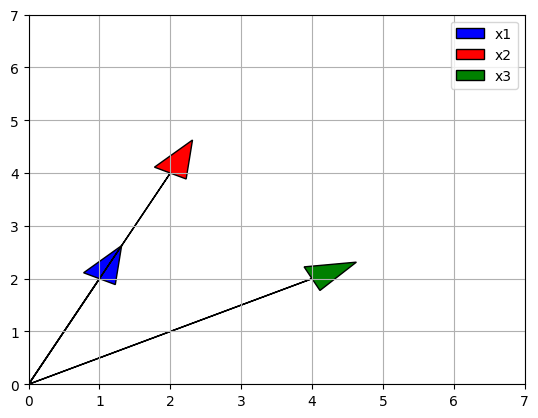

In [ ]:
#@title Plot
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes()

ax.arrow(0, 0,X1[0], X1[1], head_width=0.5, head_length=0.7, fc='blue', ec='black', label='x1')
ax.arrow(0, 0, X2[0], X2[1], head_width=0.5, head_length=0.7, fc='red', ec='black', label='x2')
ax.arrow(0, 0, X3[0],X3[1], head_width=0.5, head_length=0.7, fc='green', ec='black', label='x3')
plt.grid()
plt.xlim(0,7)
plt.ylim(0,7)
plt.legend()

####Calculando a similaridade do X1 e X2

In [ ]:
import math

xy=X1[0]*X2[0]+X1[1]*X2[1]
print(xy)


10


In [ ]:
_x=math.sqrt(X1[0]**2+X1[1]**2)
_y=math.sqrt(X2[0]**2 +X2[1]**2)
print(_x)


2.23606797749979


In [ ]:
cosine=xy/(_x*_y)
print(cosine)

0.9999999999999998


 Intervalo dos valores

1 → vetores idênticos (mesma direção)


0 → vetores ortogonais (sem similaridade)


−1 → vetores opostos (direções contrárias)

####Calculando a similaridade do X1 e X3

In [ ]:
xy=X1[0]*X3[0]+X1[1]*X3[1]
_x=math.sqrt(X1[0]**2+X1[1]**2)
_y=math.sqrt(X3[0]**2+X3[1]**2)
cosine=xy/(_x*_y)
print(cosine)

0.7999999999999998


Qual é o mais próximo?

### Cosine similarity usando sklearn

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

X1_reshaped = np.array(X1).reshape(1, -1)
X2_reshaped = np.array(X2).reshape(1, -1)

print(f"Shape of X1: {X1_reshaped.shape}")
print(f"Shape of X2: {X2_reshaped.shape}")
cosine_sim_x1_x2 = cosine_similarity(X1_reshaped, X2_reshaped)
print(f"Cosine similarity between X1 and X2 (sklearn): {cosine_sim_x1_x2[0][0]}")


X3_reshaped = np.array(X3).reshape(1, -1)
cosine_sim_x1_x3 = cosine_similarity(X1_reshaped, X3_reshaped)
print(f"Cosine similarity between X1 and X3 (sklearn): {cosine_sim_x1_x3[0][0]}")


Shape of X1: (1, 2)
Shape of X2: (1, 2)
Cosine similarity between X1 and X2 (sklearn): 0.9999999999999999
Cosine similarity between X1 and X3 (sklearn): 0.7999999999999999


## Atividade 1

1 - O que significa dois vetores com ângulo coseno 0º e 90º?

2 - Existe um número máximo de  dimensões que podemos trabalhar no cálculo do Coseno?

3- Calcule a similaridade entre os pontos:
x= [1,2,3]
y = [2,3,4]
z = [5,5,5]
qual é o par de pontos mais próximos?


##Distância Euclidiana


Computa a espaço entre dois pontos.

$$ Euclidean (x,y) = \sqrt {\sum _{i=1}^{n}  \left( x_{i}-y_{i}\right)^2 } $$





Exemplo:



###Plotando os dados

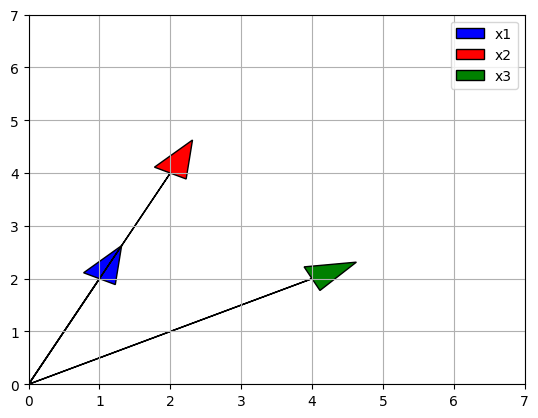

In [ ]:
#@title Plot
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes()

ax.arrow(0, 0,X1[0], X1[1], head_width=0.5, head_length=0.7, fc='blue', ec='black', label='x1')
ax.arrow(0, 0, X2[0], X2[1], head_width=0.5, head_length=0.7, fc='red', ec='black', label='x2')
ax.arrow(0, 0, X3[0],X3[1], head_width=0.5, head_length=0.7, fc='green', ec='black', label='x3')
plt.grid()
plt.xlim(0,7)
plt.ylim(0,7)
plt.legend()

###Calculando a similaridade Euclideana

In [ ]:

from sklearn.metrics.pairwise import euclidean_distances
X1_reshaped = np.array(X1).reshape(1, -1)
X2_reshaped = np.array(X2).reshape(1, -1)
X3_reshaped = np.array(X3).reshape(1, -1)


ed1=euclidean_distances(X1_reshaped, X2_reshaped)

ed2=euclidean_distances(X1_reshaped, X3_reshaped)

print (ed1)
print (ed2)

[[2.23606798]]
[[3.]]


**Pergunta**: Qual é o par mais próximo?

A métrica minkowski com p=2 tem a mesma implementação que a função Euclidiana.


$$ Minkowski (x,y) =  ({\sum _{i=1}^{n}  \left( x_{i}-y_{i}\right)^p })^{1/p} $$



##Voltando para o KNN

O KNN funciona em 3 partes:


*   Calculamos a similaridade
*   Obtemos os vizinhos mais próximos
*   Fazemos a predição



##Exemplo

In [ ]:
#@title Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
digits = load_digits()

In [ ]:
# prompt: reduce the number of features in 20% from digits

import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Calculate the number of features to keep (80%)
num_features_to_keep = int(0.3 * digits.data.shape[1])

# Reduce the number of features
reduced_data = digits.data[:, :num_features_to_keep]

# Example usage (replace with your actual KNN code):
X_train, X_test, y_train, y_test = train_test_split(reduced_data, digits.target, test_size=0.2, random_state=42)



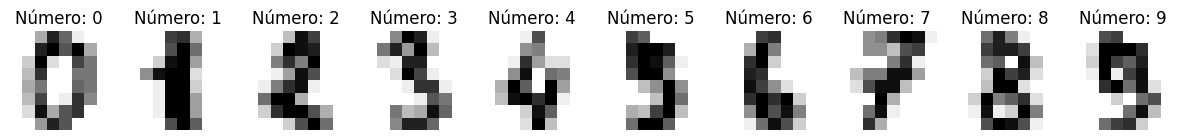

In [ ]:
#@title Load


_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Número: %i' % label)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_test)
# Predições
pred

array([4, 9, 3, 7, 3, 1, 5, 0, 5, 2, 7, 9, 6, 0, 4, 2, 3, 7, 9, 2, 4, 3,
       9, 7, 5, 6, 8, 5, 6, 7, 4, 0, 1, 4, 4, 6, 9, 4, 7, 6, 4, 0, 1, 3,
       6, 1, 3, 0, 6, 5, 7, 1, 2, 5, 6, 0, 2, 0, 0, 4, 0, 6, 5, 2, 4, 5,
       7, 0, 2, 6, 9, 5, 5, 4, 7, 0, 1, 5, 5, 9, 8, 0, 2, 3, 9, 0, 4, 6,
       4, 8, 1, 2, 1, 3, 5, 2, 2, 1, 6, 4, 4, 3, 5, 7, 1, 3, 5, 9, 6, 2,
       7, 7, 4, 4, 1, 9, 8, 7, 9, 7, 2, 6, 9, 4, 5, 3, 3, 7, 5, 8, 2, 5,
       7, 8, 0, 6, 6, 4, 1, 0, 0, 2, 4, 6, 0, 9, 6, 0, 3, 1, 5, 6, 6, 0,
       6, 4, 3, 2, 7, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 8, 8, 4, 2, 1, 3,
       7, 7, 2, 3, 3, 9, 9, 0, 3, 2, 2, 5, 6, 9, 3, 6, 1, 5, 4, 3, 2, 6,
       4, 0, 5, 0, 8, 7, 8, 0, 6, 9, 1, 5, 4, 6, 0, 6, 1, 8, 4, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 4, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 0, 1, 5,
       5, 1, 6, 0, 8, 2, 8, 0, 3, 1, 2, 2, 2, 3, 6, 0, 9, 7, 6, 0, 8, 3,
       7, 0, 1, 9, 4, 5, 0, 5, 3, 6, 0, 0, 1, 0, 3, 3, 6, 5, 0, 1, 3, 5,
       5, 9, 9, 9, 5, 9, 2, 8, 0, 6, 8, 3, 6, 0, 2,

In [ ]:
error_rate = []
accuracy_score=0
from sklearn.metrics import accuracy_score
accuracy_v=[]
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_v.append(accuracy_score(y_test, pred_i))
    error_rate.append(np.mean(pred_i != y_test))
print(accuracy_v)

[0.6833333333333333, 0.6888888888888889, 0.7222222222222222, 0.7, 0.7111111111111111, 0.725, 0.7055555555555556, 0.7138888888888889, 0.7055555555555556, 0.7055555555555556, 0.7027777777777777, 0.7111111111111111, 0.725, 0.7305555555555555, 0.7111111111111111, 0.7083333333333334, 0.7083333333333334, 0.6861111111111111, 0.6888888888888889, 0.6833333333333333, 0.6972222222222222, 0.6944444444444444, 0.7027777777777777, 0.7, 0.6972222222222222, 0.7055555555555556, 0.7083333333333334, 0.7138888888888889, 0.7138888888888889, 0.7222222222222222, 0.7, 0.7055555555555556, 0.7111111111111111, 0.7027777777777777, 0.7, 0.6944444444444444, 0.6972222222222222, 0.6972222222222222, 0.7027777777777777]


Text(0, 0.5, 'accuracy_v')

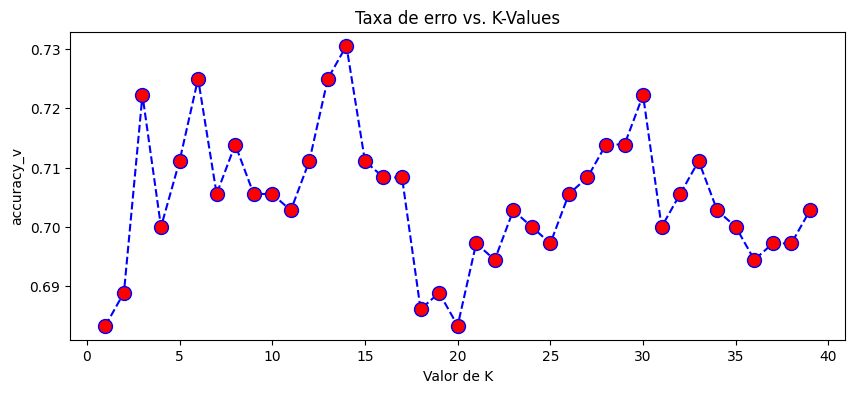

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), accuracy_v, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Taxa de erro vs. K-Values')
plt.xlabel('Valor de K')
plt.ylabel('accuracy_v')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print métricas
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.82      0.68        33
           1       0.76      0.89      0.82        28
           2       0.67      0.73      0.70        33
           3       0.68      0.68      0.68        34
           4       0.85      0.72      0.78        46
           5       0.98      0.91      0.95        47
           6       0.67      0.83      0.74        35
           7       0.76      0.76      0.76        34
           8       0.43      0.30      0.35        30
           9       0.59      0.42      0.49        40

    accuracy                           0.71       360
   macro avg       0.70      0.71      0.69       360
weighted avg       0.71      0.71      0.70       360



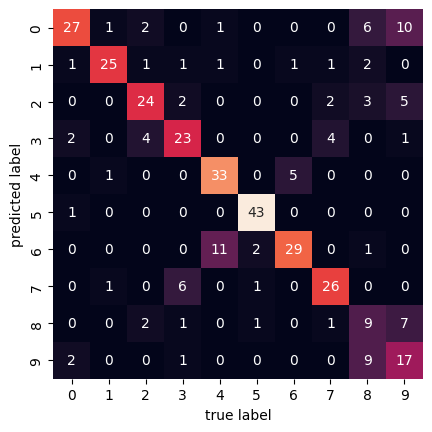

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

##Outro exemplo

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


taxa_erro=[]
accuracy_v=[]
for i in range(2,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X, y)
  y_pred = knn.predict(X)
  #print(f"acurácia com k{i}={metrics.accuracy_score(y, y_pred)}")
  taxa_erro.append(np.mean(y_pred != y))
  accuracy_v.append(metrics.accuracy_score(y, y_pred))

print(accuracy_v)

[0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98]


Text(0, 0.5, 'Taxa de Erro')

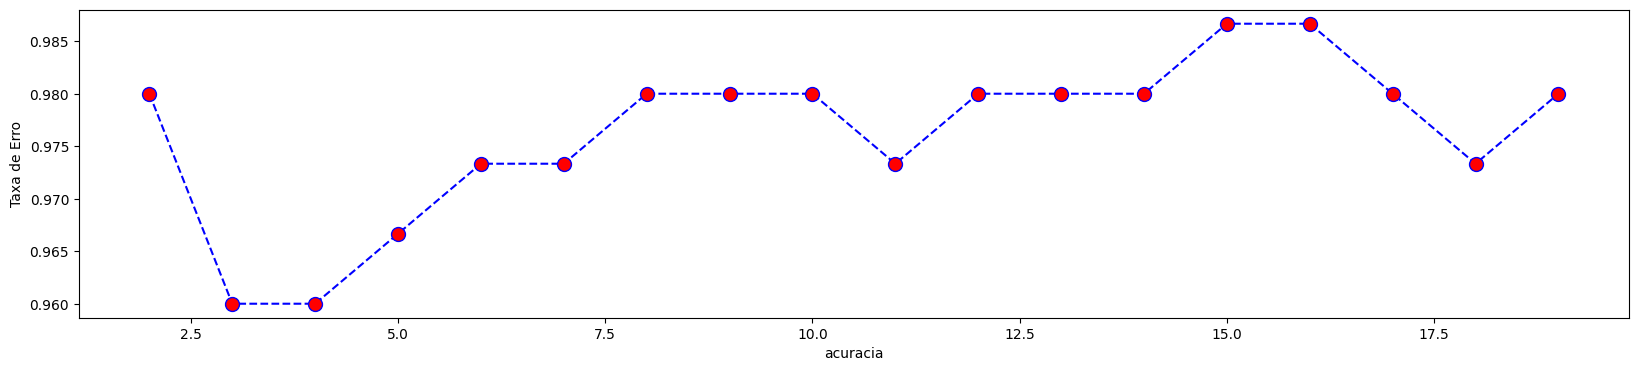

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.plot(range(2,20), accuracy_v, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.xlabel('acuracia')
plt.ylabel('Taxa de Erro')

###Atividade

Maria se deparou com o problema de como encontrar os artigos que estão relacionados ao seu tema de pesquisa. Como Maria é uma boa conhecedora dos métodos de machine learning, ela decidiu lançar um desafio para seus grupo de trabalho. Como encontrar todos e somente os artigos relevantes a sua pesquisa. Uma possibilidade é ler todos os artigos e validar manualmente, no entanto, a base contem mais de 6k artigos.
Pois bem, para ajudar Maria, vc foi selecionado para a atividade de identificar artigos os relevantes presente na coleção (no anexo) referentes a consulta "defect prediction". A base de dados em anexo é composta por informações do artigos e o LABEL. O objetivo é encontrar todos os 104 artigos relevantes em relação 7000 presentes na base de dados.

In [ ]:
#Carregando dataset
import pandas as pd
df = pd.read_csv('https://github.com/dbguilherme/Testes/raw/master/Wahono.csv', header=0).rename(columns={'Document Title': 'title', 'Abstract': 'abstract', 'Year': 'year', 'PDF Link': 'link'})
df.loc[60]

,60
title,The design of polynomial function-based neural...
abstract,In this study we introduce a design methodolog...
year,2013
label,yes


In [ ]:

df['title'] = df['title'].str.lower()
df['abstract'] = df['abstract'].str.lower()

#df['title']=df['title'].map(str)+df['abstract'].map(str)

print(df['title'][6])

tree-based software quality estimation models for fault prediction


In [ ]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

QUERY = 'defect prediction'
#tokenized_query = [lemmatizer.lemmatize(stemmer.stem(word)) for word in word_tokenize(QUERY.lower())]
#query = ' '.join(tokenized_query)

vectorizer = CountVectorizer()

X_title = vectorizer.fit_transform(df['title'])
y_title = vectorizer.transform([QUERY])
print(y_title)

# X_abstract = vectorizer.fit_transform(df['abstract'])
# y_abstract = vectorizer.transform([query])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 7112)>
  Coords	Values
  (0, 1647)	1
  (0, 4828)	1


In [ ]:

# tf-idf do titulo
tfidfconverter = CountVectorizer(max_features=30000,  stop_words='english')
tfidf=tfidfconverter.fit_transform(df['title'])



tf=tfidfconverter.transform([QUERY])
id=((tf.indices))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=50, metric='cosine').fit(tfidf, df['label'])
distances, indices = nbrs.kneighbors(tf)
#distances, indices

In [ ]:
count=0
for i in indices:
  print((df['label'].iloc[i]=='yes').value_counts())


label
False    36
True     14
Name: count, dtype: int64


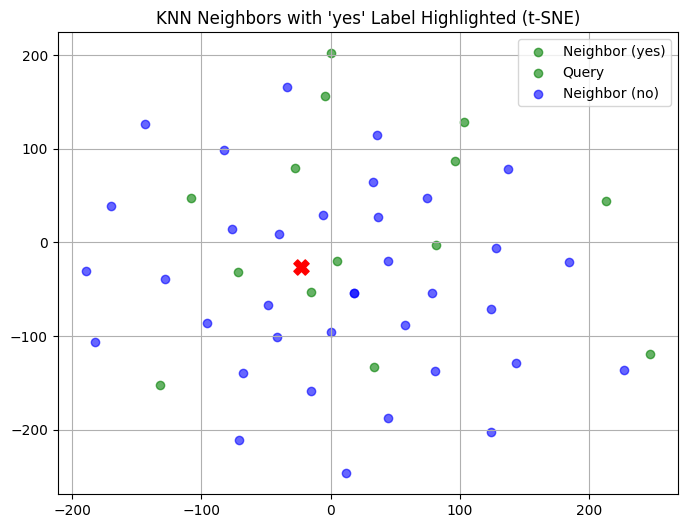

In [ ]:
from sklearn.manifold import TSNE

neighbors_vecs = tfidf[indices[0]].toarray()  # shape (50, n_features)
query_vec = tf.toarray()                      # shape (1, n_features)
# Combine for t-SNE visualization
neighbor_labels = df['label'].iloc[indices[0]].values  # labels of 50 neighbors

combined_vecs = np.vstack([query_vec, neighbors_vecs])  # shape (51, n_features)

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
points_2d = tsne.fit_transform(combined_vecs)

# Plot
plt.figure(figsize=(8, 6))


# Plot neighbors with label == 'yes' in green, others in blue
for i, label in enumerate(neighbor_labels):
    color = 'green' if label == 'yes' else 'blue'
    plt.scatter(points_2d[i + 1, 0], points_2d[i + 1, 1], color=color, alpha=0.6)

# Plot the query point in red
plt.scatter(points_2d[0, 0], points_2d[0, 1], color='red', marker='X', s=120, label='Query')

plt.title("KNN Neighbors with 'yes' Label Highlighted (t-SNE)")
plt.legend(['Neighbor (yes)', 'Query', 'Neighbor (no)'])
plt.grid(True)
plt.show()

2-Encontrar os melhores parâmetros para a variável `k` usando o F1.

3- Compare com o método Random Forest e o SVM. Qual foi melhor método em relação ao recall? Notem que que o SVM e o Random Forest sejam utilizados deve-se criar um treino e teste. Use a função abaixo para criar o treino e o teste com parte da base de dados:




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Utilize um comitê de classificadores e compare com o resultado da questão 3, qual foi o melhor?

#Comitê de classificadores

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = SVC(probability=True)
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])


X_test = np.array([[-2, -3], [-1, 6]])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X_test))

[1 2]
